In [9]:
import os
import warnings
import pandas as pd 
import numpy as np


from sklearn.tree import DecisionTreeClassifier as DT 
from sklearn.model_selection import GridSearchCV
from sklearn import tree 
from sklearn.tree import export_graphviz
import sklearn.metrics as skmet

import graphviz
warnings.filterwarnings('ignore')

In [10]:
os.chdir('../')

In [11]:
df = pd.read_csv('artifacts/data_transformation/train.csv')

dfTest = pd.read_csv('artifacts/data_transformation/test.csv')

In [12]:
df.shape

(750, 36)

In [13]:
dfTest.shape

(250, 36)

In [14]:
df['categorical__default_yes'].value_counts(normalize=True)

categorical__default_yes
0.0    0.696
1.0    0.304
Name: proportion, dtype: float64

In [15]:
dfTest['categorical__default_yes'].value_counts(normalize=True)

categorical__default_yes
0.0    0.712
1.0    0.288
Name: proportion, dtype: float64

In [16]:
# split the data train and test 

xTrain = df.drop(columns = 'categorical__default_yes')

yTrain = df['categorical__default_yes']

xTest = dfTest.drop(columns = 'categorical__default_yes')

yTest = dfTest['categorical__default_yes']

### Model 

In [17]:
model = DT(criterion = 'entropy')
model.fit(xTrain, yTrain)

DecisionTreeClassifier(criterion='entropy')

In [18]:
predictValues = model.predict(xTest)

In [19]:
predictValues

array([0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0.

In [20]:
# Accuracy 

skmet.accuracy_score(yTest, predictValues)

0.704

In [21]:
pd.crosstab(yTest, predictValues, rownames = ['Actual'], colnames = ['Predictions'] )

Predictions,0.0,1.0
Actual,,
0.0,139,39
1.0,35,37


### Hyperparameter Optimization 

In [22]:
# create a dictionary of all hyperparameters to be experimented
param_grid = { 'criterion':['gini','entropy'], 'max_depth': np.arange(3, 15)}

# Decision tree model
dtree_model = DT()

# GridsearchCV with cross-validation to perform experiments with parameters set
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv = 5, scoring = 'accuracy', return_train_score = False, verbose = 1)

In [23]:
dtree_gscv.fit(xTrain, yTrain)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='accuracy', verbose=1)

In [24]:
dtree_gscv.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [25]:
dtree_gscv.best_score_

0.7373333333333333

In [26]:
model = dtree_gscv.best_estimator_

In [27]:
predictValues = model.predict(xTest)

In [28]:
predictValues

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0.

In [29]:
# Accuracy 

skmet.accuracy_score(yTest, predictValues)

0.7

In [30]:
# the best accuracy is 0.704 

# Graph

In [31]:
predictors = list(df.drop(columns = ['categorical__default_yes']).columns)

In [32]:
print(predictors)
class_names = df['categorical__default_yes']

['numeric__months_loan_duration', 'numeric__amount', 'numeric__percent_of_income', 'numeric__years_at_residence', 'numeric__age', 'numeric__existing_loans_count', 'numeric__dependents', 'categorical__checking_balance_< 0 DM', 'categorical__checking_balance_> 200 DM', 'categorical__checking_balance_unknown', 'categorical__credit_history_good', 'categorical__credit_history_perfect', 'categorical__credit_history_poor', 'categorical__credit_history_very good', 'categorical__purpose_car', 'categorical__purpose_car0', 'categorical__purpose_education', 'categorical__purpose_furniture/appliances', 'categorical__purpose_renovations', 'categorical__savings_balance_500 - 1000 DM', 'categorical__savings_balance_< 100 DM', 'categorical__savings_balance_> 1000 DM', 'categorical__savings_balance_unknown', 'categorical__employment_duration_4 - 7 years', 'categorical__employment_duration_< 1 year', 'categorical__employment_duration_> 7 years', 'categorical__employment_duration_unemployed', 'categorical

In [33]:
dot_data = tree.export_graphviz(model, filled = True, 
                                rounded = True,
                                feature_names = predictors,
                                class_names = ["default", "not default"],
                                out_file = None)


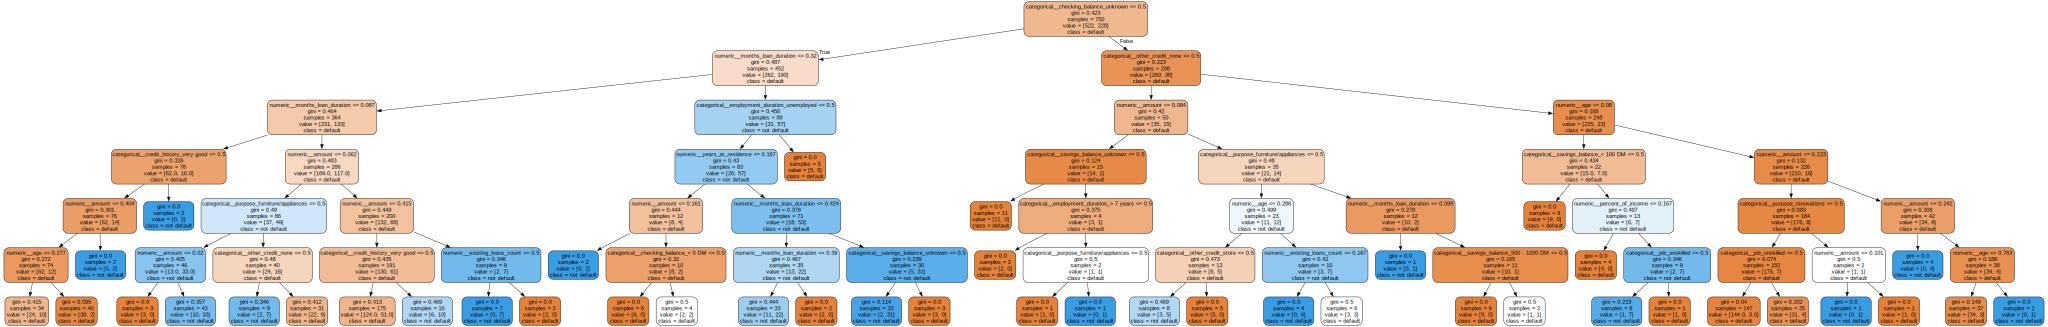

In [34]:
graph = graphviz.Source(dot_data)

graph

# Cross validation 

In [ ]:
from sklearn.model_selection import cross_validate



In [ ]:
_scoring = ['accuracy', 'precision', 'recall', 'f1']
results = cross_validate(estimator = model, X = xTrain, y = yTrain, cv = 5, scoring = _scoring, return_train_score = True)

In [39]:
pd.DataFrame(results)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.003000,0.008001,0.726667,0.835000,0.558824,0.833333,0.422222,0.573770,0.481013,0.679612
1,0.003000,0.006000,0.720000,0.836667,0.555556,0.829457,0.333333,0.584699,0.416667,0.685897
2,0.003000,0.006999,0.760000,0.815000,0.656250,0.814159,0.456522,0.505495,0.538462,0.623729
3,0.005003,0.007999,0.700000,0.831667,0.515152,0.834711,0.369565,0.554945,0.430380,0.666667
4,0.003999,0.010000,0.733333,0.841667,0.565217,0.712195,0.565217,0.802198,0.565217,0.754522


In [41]:
model

DecisionTreeClassifier(max_depth=6)